# 서드파티 패키지 불러오기

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기

In [68]:
df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')

df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [69]:
df.shape

(16598, 10)

In [70]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

# 데이터 전처리

## 결측치 확인

In [71]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

## 결측치 제거

In [72]:
df = df.dropna(axis=0)

In [73]:
df.shape

(16241, 10)

In [74]:
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [75]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

## 'Unnamed: 0'열 제거 

In [76]:
# 'Unnamed: 0'열 제거
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [77]:
df.shape

(16241, 9)

## 'Year'열 Value 조정

In [78]:
df = df.astype({'Year': 'int'})
print(df.dtypes)

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object


In [79]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [80]:
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16597,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


In [81]:
# 'Year'열의 일부는 2자리 연도로 데이터가 반영되어 있기 때문에 4자리로 변환할 필요가 있음
# 0 ~ 21까지의 값에는 2000 가산, 99이하의 값에는 1900 가산
def year_cnt(x):
    if x >= 0 and x <= 21:
        return x + 2000
    if x < 100:
        return x + 1900
    return x

In [82]:
df['Year'] = df['Year'].apply(year_cnt)

In [83]:
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16597,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


## 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' 값 조정, 'Total_Sales'열 생성

In [84]:
# 해당 열의 'M', 'K' 문자열이 포함된 값에 대한 값 조정 필요
# M, K값 수치 변환 및 기본값은 1,000을 곱하여 수치 조정 함수 선언
# 기본단위 1,000으로 설정
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x * 1000
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K','')) * 1
        return 1
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M','')) * 1000
    return float(x) * 1000

In [85]:
# 각 열마다 함수 적용
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [86]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0


In [87]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [88]:
# Total_Sales 열 생성
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0


# 데이터 분석

## 전 세계 출고량 / 지역별 출고량

In [89]:
df_tot = df.drop(['Name','Platform','Genre','Publisher'],axis=1)
df_tot_res = df_tot.groupby('Year').sum()
df_tot_res

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,
1980,10130.0,640.0,0.0,110.0,10880.0
1981,33400.0,1960.0,0.0,320.0,35680.0
1982,26920.0,1650.0,0.0,310.0,28880.0
1983,7760.0,800.0,8100.0,140.0,16800.0
1984,33280.0,2100.0,14270.0,700.0,50350.0
1985,33730.0,4740.0,14560.0,920.0,53950.0
1986,12500.0,2840.0,19810.0,1930.0,37080.0
1987,8460.0,1410.0,11630.0,200.0,21700.0
1988,23870.0,6590.0,15760.0,990.0,47210.0


1. 2009년부터 판매량의 합은 감소세이다.
2. 각 지역(북미, 유럽, 일본, 기타 지역)의 판매량 또한 감소세이다.
3. 2016년, 2017년, 2020년의 판매량은 현저하게 감소하는 모습을 보인다.

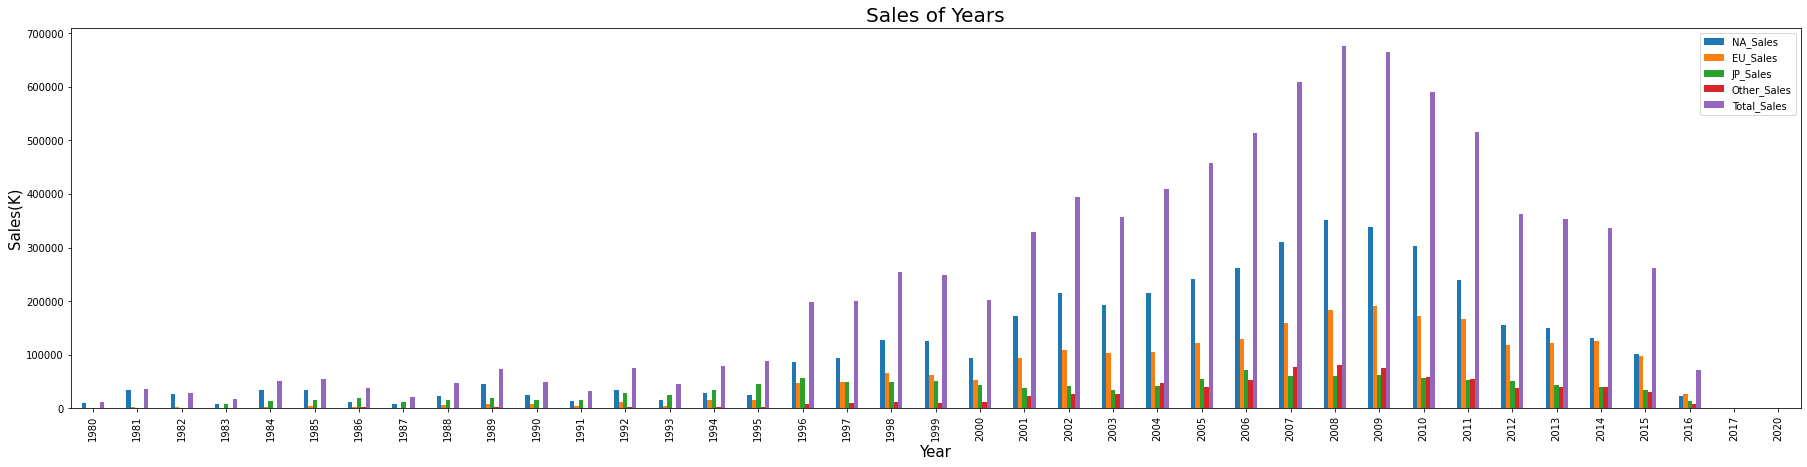

In [90]:
plt.rcParams['figure.figsize']=(31, 7)
df_tot_res.plot.bar()
plt.title('Sales of Years',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Sales(K)', fontsize=15)

plt.show()

## 전 세계 선호 장르

In [91]:
df_genre = df.drop(['Name', 'Year', 'Platform', 'Publisher'], axis=1)
df_genre.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,40.0,0.0,0.0,0.0,40.0
1,Action,170.0,0.0,0.0,10.0,180.0
2,Adventure,0.0,0.0,20.0,0.0,20.0
3,Misc,40.0,0.0,0.0,0.0,40.0
4,Platform,120.0,90.0,0.0,40.0,250.0


In [92]:
df_genre_tot = df_genre.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
df_genre_tot_res = df_genre_tot.groupby('Genre').sum()
#df_genre_tot_res['Percentage(%)'] = round(df_genre_tot_res['Total_Sales'] / df_genre_tot_res['Total_Sales'].sum() * 100, 2)
df_genre_tot_res = df_genre_tot_res.sort_values(by=['Total_Sales'], axis=0, ascending=False).reset_index()
df_genre_tot_res

,Genre,Total_Sales
0,Action,1712980.0
1,Sports,1305340.0
2,Shooter,1024750.0
3,Role-Playing,901510.0
4,Platform,827990.0
5,Misc,779700.0
6,Racing,722550.0
7,Fighting,443540.0
8,Simulation,389280.0
9,Puzzle,240730.0


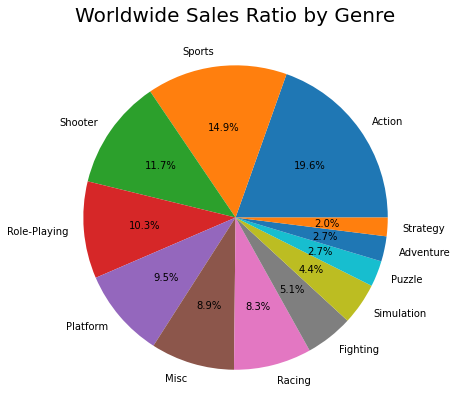

In [93]:
plt.pie(df_genre_tot_res['Total_Sales'], labels=df_genre_tot_res['Genre'], autopct='%0.1f%%')
plt.title('Worldwide Sales Ratio by Genre', fontsize=20)
plt.show()

전 세계 판매량을 기준으로 Action - Sports - Shooter - Role-Playing - Platform - Misc - Racing 순으로 선호하는 것으로 보인다.

### 북미 선호 장르

In [94]:
df_genre_NA = df_genre.drop(['EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'], axis=1)
df_genre_NA_res = df_genre_NA.groupby('Genre').sum()
#df_genre_NA_res['Percentage(%)'] = round(df_genre_NA_res['NA_Sales'] / df_genre_NA_res['NA_Sales'].sum() * 100, 2)
df_genre_NA_res = df_genre_NA_res.sort_values(by=['NA_Sales'], axis=0, ascending=False).reset_index()
df_genre_NA_res 

,Genre,NA_Sales
0,Action,858750.0
1,Sports,667260.0
2,Shooter,574480.0
3,Platform,445380.0
4,Misc,394730.0
5,Racing,354700.0
6,Role-Playing,318760.0
7,Fighting,220350.0
8,Simulation,181430.0
9,Puzzle,121580.0


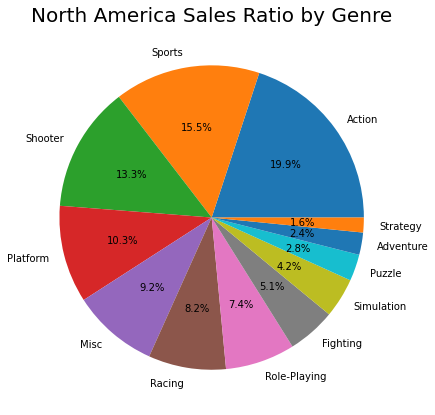

In [95]:
plt.pie(df_genre_NA_res['NA_Sales'], labels=df_genre_NA_res['Genre'], autopct='%0.1f%%')
plt.title('North America Sales Ratio by Genre', fontsize=20)
plt.show()

북미 지역은 Action - Sports - Shooter - Platform - Misc - Racing - Role-Playing 순으로 선호하는 것으로 보인다. \
상위 3개 장르인 Action - Sports - Shooter는 전세계 선호 순위와 동일하다.

### 유럽 선호 장르

In [96]:
df_genre_EU = df_genre.drop(['NA_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'], axis=1)
df_genre_EU_res = df_genre_EU.groupby('Genre').sum()
#df_genre_EU_res['Percentage(%)'] = round(df_genre_EU_res['EU_Sales'] / df_genre_EU_res['EU_Sales'].sum() * 100, 2)
df_genre_EU_res = df_genre_EU_res.sort_values(by=['EU_Sales'], axis=0, ascending=False).reset_index()
df_genre_EU_res

,Genre,EU_Sales
0,Action,513640.0
1,Sports,370970.0
2,Shooter,310230.0
3,Racing,235020.0
4,Misc,208150.0
5,Platform,200630.0
6,Role-Playing,183090.0
7,Simulation,112990.0
8,Fighting,99900.0
9,Adventure,63660.0


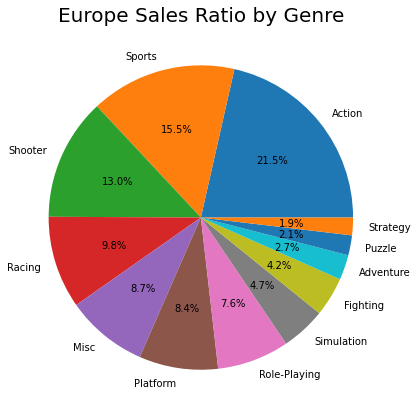

In [97]:
plt.pie(df_genre_EU_res['EU_Sales'], labels=df_genre_EU_res['Genre'], autopct='%0.1f%%')
plt.title('Europe Sales Ratio by Genre', fontsize=20)
plt.show()

유럽 지역은 Action - Sports - Shooter - Racing - Misc - Platform - Role-Playing 순으로 선호하는 것으로 보인다. \
상위 3개 장르인 Action - Sports - Shooter는 전세계 선호 순위와 동일하다.

### 일본 선호 장르

In [98]:
df_genre_JP = df_genre.drop(['NA_Sales', 'EU_Sales', 'Other_Sales', 'Total_Sales'], axis=1)
df_genre_JP_res = df_genre_JP.groupby('Genre').sum()
#df_genre_JP_res['Percentage(%)'] = round(df_genre_JP_res['JP_Sales'] / df_genre_JP_res['JP_Sales'].sum() * 100, 2)
df_genre_JP_res = df_genre_JP_res.sort_values(by=['JP_Sales'], axis=0, ascending=False).reset_index()
df_genre_JP_res

,Genre,JP_Sales
0,Role-Playing,342930.0
1,Action,156600.0
2,Sports,134760.0
3,Platform,130530.0
4,Misc,104180.0
5,Fighting,87140.0
6,Simulation,63540.0
7,Racing,56320.0
8,Puzzle,56240.0
9,Adventure,51870.0


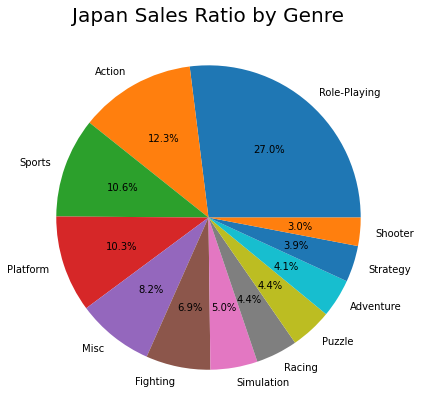

In [99]:
plt.pie(df_genre_JP_res['JP_Sales'], labels=df_genre_JP_res['Genre'], autopct='%0.1f%%')
plt.title('Japan Sales Ratio by Genre', fontsize=20)
plt.show()

일본은 Role-Playing - Action - Sports - Platform - Misc - Fighting - Simulation 순으로 선호하는 것을 알 수 있다. \
전 세계 선호 장르와 일부 차이가 있다는 것을 알 수 있다.

### 기타 국가 선호 장르

In [100]:
df_genre_Other = df_genre.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Total_Sales'], axis=1)
df_genre_Other_res = df_genre_Other.groupby('Genre').sum()
#df_genre_Other_res['Percentage(%)'] = round(df_genre_Other_res['Other_Sales'] / df_genre_Other_res['Other_Sales'].sum() * 100, 2)
df_genre_Other_res = df_genre_Other_res.sort_values(by=['Other_Sales'], axis=0, ascending=False).reset_index()
df_genre_Other_res

,Genre,Other_Sales
0,Action,183990.0
1,Sports,132350.0
2,Shooter,101860.0
3,Racing,76510.0
4,Misc,72640.0
5,Role-Playing,56730.0
6,Platform,51450.0
7,Fighting,36150.0
8,Simulation,31320.0
9,Adventure,16700.0


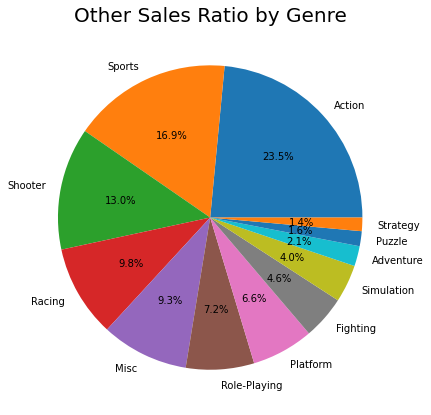

In [101]:
plt.pie(df_genre_Other_res['Other_Sales'], labels=df_genre_Other_res['Genre'], autopct='%0.1f%%')
plt.title('Other Sales Ratio by Genre', fontsize=20)
plt.show()

기타 국가 지역은 Action - Sports - Shooter - Racing - Misc - Role-Playing - Platform 순으로 선호하는 것으로 보인다. \
상위 3개 장르인 Action - Sports - Shooter는 전세계 선호 순위와 동일하다.

### 전 세계 선호 장르에 대한 분석 결과
1. 지역별 선호하는 게임의 장르는 북미, 유럽, 기타 지역은 Action, Sports, Shooter 순서로 동일했다. 
2. 하지만 일본의 경우 Role-playing, Action, Sports 순서로 분포되어 북미, 유럽, 기타 지역에 대한 선호 장르의 순위의 차이가 있었다.
3. 전 세계 선호 순위를 봤을 때, Action 또는 Sports 장르로 차기 게임을 개발한다면 회사에 이익이 될 가능성이 있다고 본다.

## 연도별 게임 트렌드

In [102]:
# 연도별 판매량 높은 상위 3개 장르 추출
# 기본 데이터프레임 정의
df_year_genre = df.drop(['Name', 'Publisher', 'Platform', 'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales'], axis=1)
df_year_genre

,Year,Genre,Total_Sales
0,2008,Action,40.0
1,2009,Action,180.0
2,2010,Adventure,20.0
3,2010,Misc,40.0
4,2010,Platform,250.0
...,...,...,...
16593,2006,Platform,200.0
16594,2005,Action,10.0
16595,2015,Sports,790.0
16596,2013,Action,380.0


In [103]:
def get_groups_Total_Sales_sum_top3(group, grouping_col, n=3):
    tops = group.groupby(grouping_col)['Total_Sales'].sum()
    return tops.nlargest(n)

#df_year_genre_res = df_year_genre.groupby(['Year', 'Genre']).sum()
#df_year_genre_res.sort_values(by=['Year', 'Total_Sales'], ascending=False)

df_year_genre_res = df_year_genre.groupby('Year').apply(get_groups_Total_Sales_sum_top3, 'Genre', 3)
pd.set_option('display.max_row', 200)

df_year_genre_res = pd.DataFrame(df_year_genre_res)
#df_year_genre_res = df_year_genre_res.reset_index()
df_year_genre_res

Total_Sales
Year Genre                    
1980 Shooter            7070.0
     Misc               2700.0
     Fighting            770.0
1981 Action            14790.0
     Shooter           10020.0
     Platform           6920.0
1982 Puzzle            10040.0
     Action             6500.0
     Platform           5030.0
1983 Platform           6930.0
     Sports             3200.0
     Action             2860.0
1984 Shooter           31100.0
     Sports             6170.0
     Racing             5950.0
1985 Platform          43170.0
     Action             3520.0
     Puzzle             3210.0
1986 Action            13740.0
     Platform           9390.0
     Sports             5580.0
1987 Fighting           5420.0
     Role-Playing       4650.0
     Adventure          4380.0
1988 Platform          27730.0
     Role-Playing       5880.0
     Puzzle             5580.0
1989 Puzzle            37750.0
     Platform          20660.0
     Sports             5720.0
1990 Platform          22980.0
     Action             6390.0
     Racing             6250.0
1991 Platform           7630.0
     Action             6760.0
     Role-Playing       3260.0
1992 Fighting          15230.0
     Platform          13410.0
     Adventure         12240.0
1993 Platform          18680.0
     Fighting           8750.0
     Role-Playing       5590.0
1994 Platform          28760.0
     Fighting           8470.0
     Sports             8410.0
1995 Platform          16690.0
     Fighting          14840.0
     Role-Playing      14270.0
1996 Role-Playing      43990.0
     Platform          28230.0
     Racing            27850.0
1997 Racing            31920.0
     Sports            30040.0
     Action            27590.0
1998 Sports            41750.0
     Action            39410.0
     Fighting          31680.0
1999 Role-Playing      47240.0
     Racing            37190.0
     Sports            30210.0
2000 Sports            41240.0
     Action            33890.0
     Role-Playing      29040.0
2001 Action            56680.0
     Racing            55830.0
     Sports            51470.0
2002 Action            86650.0
     Sports            65310.0
     Shooter           47640.0
2003 Action            67980.0
     Sports            55960.0
     Racing            52180.0
2004 Action            76150.0
     Sports            61110.0
     Role-Playing      53950.0
2005 Action            85520.0
     Misc              59690.0
     Sports            59530.0
2006 Sports           136120.0
     Misc              67230.0
     Action            66490.0
2007 Action           105990.0
     Sports            98240.0
     Misc              91070.0
2008 Action           135460.0
     Sports            95240.0
     Misc              86180.0
2009 Sports           138590.0
     Action           138320.0
     Misc              76900.0
2010 Action           117500.0
     Sports            92020.0
     Misc              88400.0
2011 Action           119000.0
     Shooter           99350.0
     Sports            57060.0
2012 Action           120780.0
     Shooter           72840.0
     Role-Playing      47770.0
2013 Action           125210.0
     Shooter           62730.0
     Sports            41540.0
2014 Action            99010.0
     Shooter           65990.0
     Sports            46640.0
2015 Action            68250.0
     Shooter           66120.0
     Sports            41490.0
2016 Action            19840.0
     Shooter           18170.0
     Sports            14630.0
2017 Role-Playing         40.0
     Action               10.0
2020 Simulation          290.0

In [104]:
# Genre별 데이터셋 준비
# Action
action = df_year_genre['Genre'] == 'Action'
df_year_action = df_year_genre[action].groupby('Year').sum()
df_year_action = df_year_action.reset_index()
# Sports
sports = df_year_genre['Genre'] == 'Sports'
df_year_sports = df_year_genre[sports].groupby('Year').sum()
df_year_sports = df_year_sports.reset_index()
# Shooter
shooter = df_year_genre['Genre'] == 'Shooter'
df_year_shooter = df_year_genre[shooter].groupby('Year').sum()
df_year_shooter = df_year_shooter.reset_index()
# Role-Playing
rp = df_year_genre['Genre'] == 'Role-Playing'
df_year_rp = df_year_genre[rp].groupby('Year').sum()
df_year_rp = df_year_rp.reset_index()
# Platform
platform = df_year_genre['Genre'] == 'Platform'
df_year_platform = df_year_genre[platform].groupby('Year').sum()
df_year_platform = df_year_platform.reset_index()
# Misc
misc = df_year_genre['Genre'] == 'Misc'
df_year_misc = df_year_genre[misc].groupby('Year').sum()
df_year_misc = df_year_misc.reset_index()
# Racing
racing = df_year_genre['Genre'] == 'Racing'
df_year_racing = df_year_genre[racing].groupby('Year').sum()
df_year_racing = df_year_racing.reset_index()
# Fighting
fighting = df_year_genre['Genre'] == 'Fighting'
df_year_fighting = df_year_genre[fighting].groupby('Year').sum()
df_year_fighting = df_year_fighting.reset_index()
# Simulation
simulation = df_year_genre['Genre'] == 'Simulation'
df_year_simulation = df_year_genre[simulation].groupby('Year').sum()
df_year_simulation = df_year_simulation.reset_index()
# Puzzle
puzzle = df_year_genre['Genre'] == 'Puzzle'
df_year_puzzle = df_year_genre[puzzle].groupby('Year').sum()
df_year_puzzle = df_year_puzzle.reset_index()
# Adventure
adventure = df_year_genre['Genre'] == 'Adventure'
df_year_adventure = df_year_genre[adventure].groupby('Year').sum()
df_year_adventure = df_year_adventure.reset_index()
# Strategy
strategy = df_year_genre['Genre'] == 'Strategy'
df_year_strategy = df_year_genre[strategy].groupby('Year').sum()
df_year_strategy = df_year_strategy.reset_index()

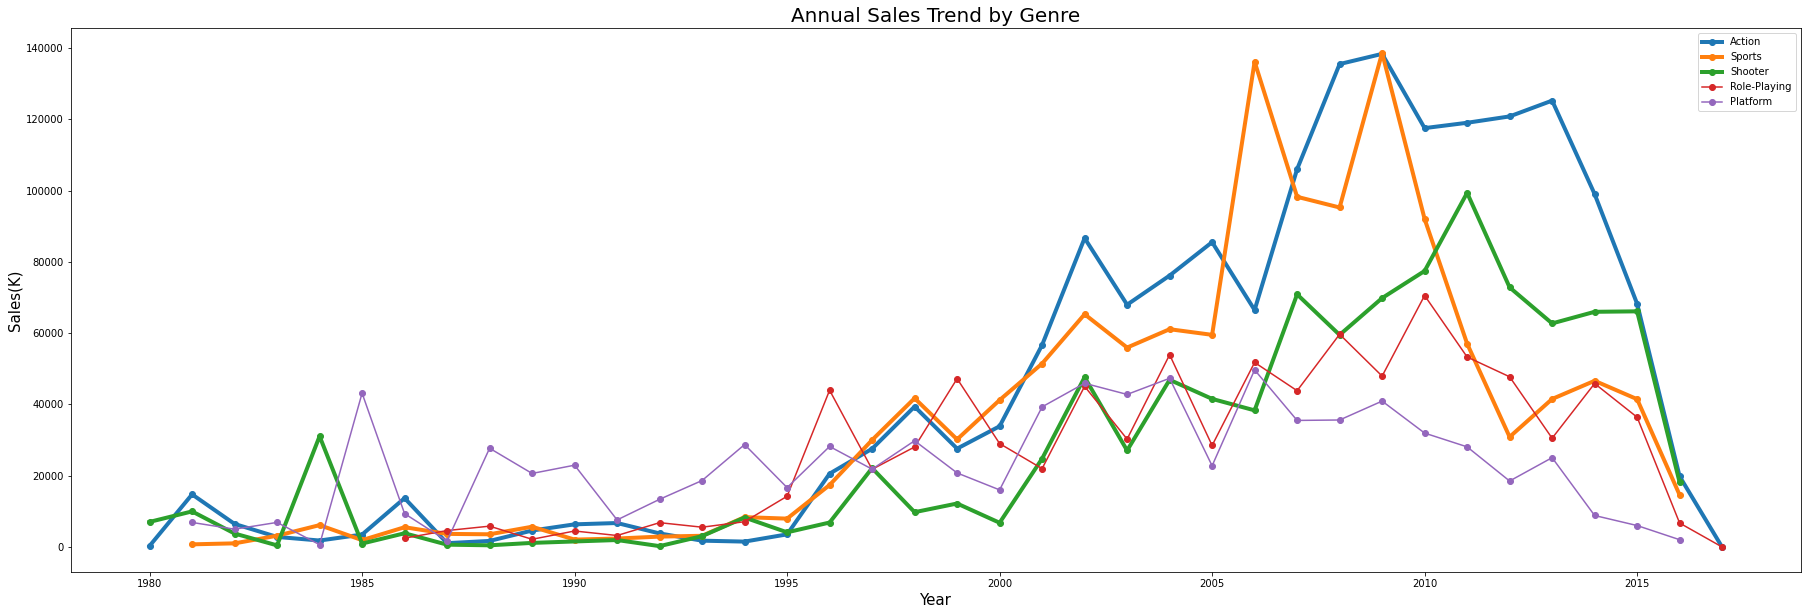

In [105]:
# 선형 그래프 시각화
fig = plt.figure(figsize=(31,10))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(df_year_action['Year'], df_year_action['Total_Sales'], marker='o', linewidth=4.0, label='Action')
ax.plot(df_year_sports['Year'], df_year_sports['Total_Sales'], marker='o', linewidth=4.0, label='Sports')
ax.plot(df_year_shooter['Year'], df_year_shooter['Total_Sales'], marker='o', linewidth=4.0, label='Shooter')
ax.plot(df_year_rp['Year'], df_year_rp['Total_Sales'], marker='o', label='Role-Playing')
ax.plot(df_year_platform['Year'], df_year_platform['Total_Sales'], marker='o', label='Platform')
#ax.plot(df_year_misc['Year'], df_year_misc['Total_Sales'], marker='o', label='Misc')
#ax.plot(df_year_racing['Year'], df_year_racing['Total_Sales'], marker='o', label='Racing')
#ax.plot(df_year_fighting['Year'], df_year_fighting['Total_Sales'], marker='o', label='Fighting')
#ax.plot(df_year_simulation['Year'], df_year_simulation['Total_Sales'], marker='o', label='Simulation')
#ax.plot(df_year_puzzle['Year'], df_year_puzzle['Total_Sales'], marker='o', label='Puzzle')
#ax.plot(df_year_adventure['Year'], df_year_adventure['Total_Sales'], marker='o', label='Adventure')
#ax.plot(df_year_strategy['Year'], df_year_strategy['Total_Sales'], marker='o', label='Strategy')

ax.legend()

plt.title('Annual Sales Trend by Genre', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales(K)', fontsize=15)
plt.show()

### 연도별 게임 트렌드 분석 결과
1. 2000년대에는 액션과 스포츠 장르의 게임이 높은 판매량을 보인다.
2. 2010년부터 액션 게임이 많은 판매량을 보이고 있다.
3. 2010년대의 판매량 추이를 보면 게임시장에서의 액션, 슈팅, 스포츠 게임의 선호도가 높은 것을 볼 수 있다.
4. 자사의 차기 게임은 액션, 슈팅, 스포츠 게임 장르로 개발하는 것이 타당하다고 평가할 수 있다.

## 출고량 높은 게임
출고량이 높은 게임은 Total_Sales에서 파악하는 것과, Action, Shooting, Sports 장르의 게임 중 출고량이 높은 게임으로 나누어서 파악하는 것이 게임사의 차기 작품을 판단하는데 유용할 것으로 판단했다.

### 데이터 전체에서 판매량이 높은 게임

In [106]:
df_top = df.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
df_top.sort_values(by='Total_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,82740.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,40240.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,35830.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,33000.0
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31380.0
...,...,...,...,...,...,...
8834,Double Sequence: The Q-Virus Invasion,DS,2008,Puzzle,Zoo Digital Publishing,10.0
2876,Command & Conquer Collection,PC,2003,Strategy,Electronic Arts,10.0
2890,Red Ninja: End of Honor,XB,2005,Action,Vivendi Games,10.0
11880,Grand Prix Legends,PC,1997,Racing,Vivendi Games,10.0


전체 데이터셋에서 가장 높은 출고량을 보유한 게임은 'Wii Sports(Sports)', 'Super Mario Bros.(Platform)', 'Mario Kart Wii(Racing)', Wii Sports Resort(Sport)' 순임을 알 수 있다. 

In [107]:
# 10년 단위 판매량 비율
df_top['10year_period'] = 0

def period(x):
    if x >= 1980 and x <= 1989:
        return '1980s'
    if x >= 1990 and x <= 1999:
        return '1990s'
    if x >= 2000 and x <= 2009:
        return '2000s'
    if x >= 2010 and x <= 2019:
        return '2010s'
    if x >= 2020 and x <= 2029:
        return '2020s'
    return 0

df_top['10year_period'] = df_top['Year'].apply(period)
df_top

,Name,Platform,Year,Genre,Publisher,Total_Sales,10year_period
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,2000s
1,The Munchables,Wii,2009,Action,Namco Bandai Games,180.0,2000s
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,20.0,2010s
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,2010s
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,250.0,2010s
...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,200.0,2000s
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,2000s
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,790.0,2010s
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,380.0,2010s


In [108]:
df_top_period = df_top.drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
df_top_period = df_top_period.groupby('10year_period').sum()
df_top_period = df_top_period.reset_index()

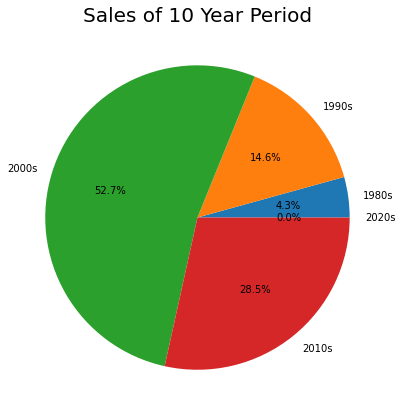

In [109]:
plt.pie(df_top_period['Total_Sales'], labels=df_top_period['10year_period'], autopct='%0.1f%%')
plt.title('Sales of 10 Year Period', fontsize=20)
plt.show()

In [115]:
# 2000년 이후 판매량이 높은 게임 파악
df_top_2000 = df_top['10year_period'] == '2000s'
df_top[df_top_2000].sort_values(by='Total_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,Total_Sales,10year_period
2908,Wii Sports,Wii,2006,Sports,Nintendo,82740.0,2000s
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,35830.0,2000s
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,33000.0,2000s
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,30010.0,2000s
3014,Wii Play,Wii,2006,Misc,Nintendo,29010.0,2000s
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28610.0,2000s
11137,Nintendogs,DS,2005,Simulation,Nintendo,24750.0,2000s
10650,Mario Kart DS,DS,2005,Racing,Nintendo,23430.0,2000s
3435,Wii Fit,Wii,2007,Sports,Nintendo,22720.0,2000s
10899,Wii Fit Plus,Wii,2009,Sports,Nintendo,22000.0,2000s


2000년 이후 가장 높은 출고량을 보유한 게임은 'Wii Sports(Sports)', 'Mario Kart Wii(Racing)', 'Wii Sports Resort(Sports)순서로 나타난다. \
여기서 주목할 점은 당시 출시된 PS3, Xbox360과는 차별화된 '닌텐도'사의 Wii와 DS플랫폼이 출시됨에 따라 소비자들은 해당 플랫폼의 게임을 주로 구매한 것으로 볼 수 있다.

In [116]:
# 2010년 이후 판매량이 높은 게임 파악
df_top_2010 = df_top['10year_period'] == '2010s'
df_top[df_top_2010].sort_values(by='Total_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,Total_Sales,10year_period
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,21820.0,2010s
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,21390.0,2010s
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,16380.0,2010s
10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,15320.0,2010s
2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,14760.0,2010s
6248,Call of Duty: Black Ops,X360,2010,Shooter,Activision,14640.0,2010s
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,14240.0,2010s
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,14040.0,2010s
6393,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,13740.0,2010s
14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,13470.0,2010s


2010년 이후 Xbox360을 주력플랫폼으로 한 'Kinect Adventures!(Misc)'게임이 출고 1위를 보였으나, 그 외 PS3, 4, Xbox360을 주축으로 한 'Grand Theft Auto V(Action)'와 'Call of Duty(Shooter)'게임이 강세임을 알 수 있다.

## 장르 별 출고량 높은 게임

### Action 장르 출고량 순위

In [117]:
df_top_action = df_top['Genre'] == 'Action'
df_top[df_top_action & df_top_2010].sort_values(by='Total_Sales',ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,Total_Sales,10year_period
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,21390.0,2010s
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,16380.0,2010s
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,11990.0,2010s
9035,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,8250.0,2010s
11868,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,6820.0,2010s
16276,Red Dead Redemption,PS3,2010,Action,Take-Two Interactive,6600.0,2010s
1629,Assassin's Creed III,PS3,2012,Action,Ubisoft,6500.0,2010s
10131,Red Dead Redemption,X360,2010,Action,Take-Two Interactive,6330.0,2010s
8082,The Last of Us,PS3,2013,Action,Sony Computer Entertainment Europe,5980.0,2010s
14823,Batman: Arkham City,PS3,2011,Action,Warner Bros. Interactive Entertainment,5520.0,2010s


Action 장르의 게임은 Grand Theft Auto가 멀티플랫폼 게임으로 개발되어 판매되었다는 점을 알 수 있고, 다양한 게임이 인기있게 판매되는 것을 알 수 있다.
또한 일부는 시리즈물로 출시되었다는 점을 알 수 있다.

### Shooter 장르 출고량 순위

In [118]:
df_top_shooter = df_top['Genre'] == 'Shooter'
df_top[df_top_shooter & df_top_2010].sort_values(by='Total_Sales',ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,Total_Sales,10year_period
2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,14760.0,2010s
6248,Call of Duty: Black Ops,X360,2010,Shooter,Activision,14640.0,2010s
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,14240.0,2010s
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,14040.0,2010s
6393,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,13740.0,2010s
14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,13470.0,2010s
9924,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,12730.0,2010s
5604,Call of Duty: Ghosts,X360,2013,Shooter,Activision,10210.0,2010s
12600,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,9870.0,2010s
14576,Halo 4,X360,2012,Shooter,Microsoft Game Studios,9760.0,2010s


Shooter 장르의 게임은 Call of Duty 시리즈와 Halo 시리즈가 주로 출고되었으며, 이 두 게임의 특징은 시리즈물로 출시된다는 점에서 소비자의 구매를 유도하는 것으로 볼  수 있다.

### Sports 장르 출고량 순위

In [119]:
df_top_sports = df_top['Genre'] == 'Sports'
df_top[df_top_sports & df_top_2010].sort_values(by='Total_Sales',ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,Total_Sales,10year_period
2639,FIFA 16,PS4,2015,Sports,Electronic Arts,8490.0,2010s
2723,FIFA 14,PS3,2013,Sports,Electronic Arts,6900.0,2010s
14786,Zumba Fitness,Wii,2010,Sports,505 Games,6810.0,2010s
13489,FIFA 12,PS3,2011,Sports,Electronic Arts,6690.0,2010s
3079,FIFA 15,PS4,2014,Sports,Electronic Arts,6600.0,2010s
5601,Kinect Sports,X360,2010,Sports,Microsoft Game Studios,6240.0,2010s
10192,FIFA Soccer 11,PS3,2010,Sports,Electronic Arts,5080.0,2010s
14464,FIFA 15,PS3,2014,Sports,Electronic Arts,4820.0,2010s
15481,FIFA 17,PS4,2016,Sports,Electronic Arts,4780.0,2010s
7865,FIFA 14,X360,2013,Sports,Electronic Arts,4320.0,2010s


Sports 장르 게임은 Electronic Arts사의 FIFA게임이 출고량이 높게 형성되어 있다.
이는 연도별 시리즈물로 출시하여 소비자들의 구매를 유도하는 것으로 볼 수 있다.

# 결론
우리 게임사는 2가지 개임 개발 방향을 수립할 수 있다.
1. 우리는 새로운 게임을 출시해야하기 때문에 Action장르의 게임을 개발하는 것이 적합할 것이다.
2. 개발단계에서 게임의 스토리를 개발함에 있어, 이후 시리즈화 하여 출시할 수 있도록 장기적인 스토리 구성을 기획하여야 한다.
3. 현재 Action게임에서 중요한 특징은 '자유도'와 '스토리 흐름'이다. 이는 상호 대립적인 관계로써 우리 게임사는 2가지 특성에 대한 비중도 고려해야 할 것이다.